In [130]:
def cartesian_product(x,y):
    """
    retrun catesian product
    """
    return np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])



class VectorGround:
    def __init__(self, range=[-3,10], fig_size=(20,20),**kwargs):
        self.plt = plt
        self.plt.figure(figsize=fig_size)
        self.range=range
        self.ax = self.plt.gca()
        self.ax.set_aspect('equal')
        plt.grid()
        self.ax.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='blue', ec='black')
        self.ax.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, fc='blue', ec='black')

        self.ax.text(1, -0.3, r'$\vec{e}_1$',fontsize=16,color='red')
        self.ax.text(-0.4, 1, r'$\vec{e}_2$',fontsize=16,color='red')
        self.plt.xlim(range[0],range[1])
        self.plt.ylim(range[0],range[1])
        self.ax.set_xlabel('X',fontsize=20)
        
        self.ax.set_ylabel('Y',fontsize=30)
        self.plt.title('',fontsize=10)

        self.plt.savefig('fig1.png', bbox_inches='tight')
    
    def add_v(self,x_0,y_0,x,y,index='1',show_cord=True,font_size=15):
        self.ax.arrow(x_0, y_0, x, y, head_width=0.1, head_length=0.1, fc='black', ec='black')
    
        if show_cord:
            #self.ax.text(x, y-0.2, r'$\vec{r}_{%s}(%1.1f:%1.1f)$' % (index,x, y),fontsize=font_size,color='blue')
            self.ax.text(x, y-0.2, r'$\vec{r}_{%s}(%1.0f:%1.0f)$' % (index,x, y),fontsize=font_size,color='blue')
    def plot_points(self,points,color='b'):
        for p in points:
            self.plt.scatter(p[0],p[1],color=color)

In [84]:
import sys
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
parentdir =parentdir+'/'+'daoutil'
print( parentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
import numpy as np
import math

#my libs
from dplot import Dplot2D

/home/daodeiv/GIT_PROJECTS/Machine-Learning/daoutil


# Linear operator and linear tranformations

## Linear opeartor
###  The operator A acts on linear space $L^n$ is linear if for every x,y $\in $ $L^n$ and $\gamma x,\beta \in R $ is  satify $A(\gamma x+ \beta y)=\gamma A(x) + \beta A(y)$ 
exmaple : 
  The matrix $$ \begin{bmatrix} 1 & 2 \\ 2 & 3  \end{bmatrix}$$ is the linear operator over vecors $x_i \in L^2 $ 
  $$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; x = \begin{bmatrix} 3 \\ 2   \end{bmatrix},y=\begin{bmatrix} 1 \\ 3   \end{bmatrix}  $$  then 
  $$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; x = \begin{bmatrix} 3 \\ 2   \end{bmatrix},y=\begin{bmatrix} 1 \\ 3   \end{bmatrix}

### Linear Mappling
#### Rotation (antismetric matrix)
Let to have linear opearator  <br> <br> 
$$T(\alpha) =  \begin{bmatrix}cos(45^*) & -sin(45^*) \\ sin(45^*) & cos(45^*)  \end{bmatrix}=  \begin{bmatrix} 0.7  & 0.7 \\ 0.7 & 0.7  \end{bmatrix}$$
$$x =\begin{bmatrix} 3 \\ 3   \end{bmatrix}$$ <br> <br>
$$x_2=T(x)= T(\alpha) =  \begin{bmatrix}cos(45^*) & -sin(45^*) \\ sin(45^*) & cos(45^*)  \end{bmatrix}=  \begin{bmatrix} 0.7  & 0.7 \\ 0.7 & 0.7  \end{bmatrix}.\begin{bmatrix} 3 \\ 3   \end{bmatrix}=\begin{bmatrix} 0 \\ 7   \end{bmatrix}$$ <br> <br>
if we make one more tranformation $$x_3=  T(x_2)= T(\alpha) =  \begin{bmatrix}cos(45^*) & -sin(45^*) \\ sin(45^*) & cos(45^*)  \end{bmatrix}=  \begin{bmatrix} 0.7  & -0.7 \\ 0.7 & 0.7  \end{bmatrix}.\begin{bmatrix} 0 \\ 7   \end{bmatrix}=\begin{bmatrix} -4.9 \\ 4.9   \end{bmatrix}$$
### The linear tranformation T rotate every vector with 45 degree

[[0. ]
 [4.2]]


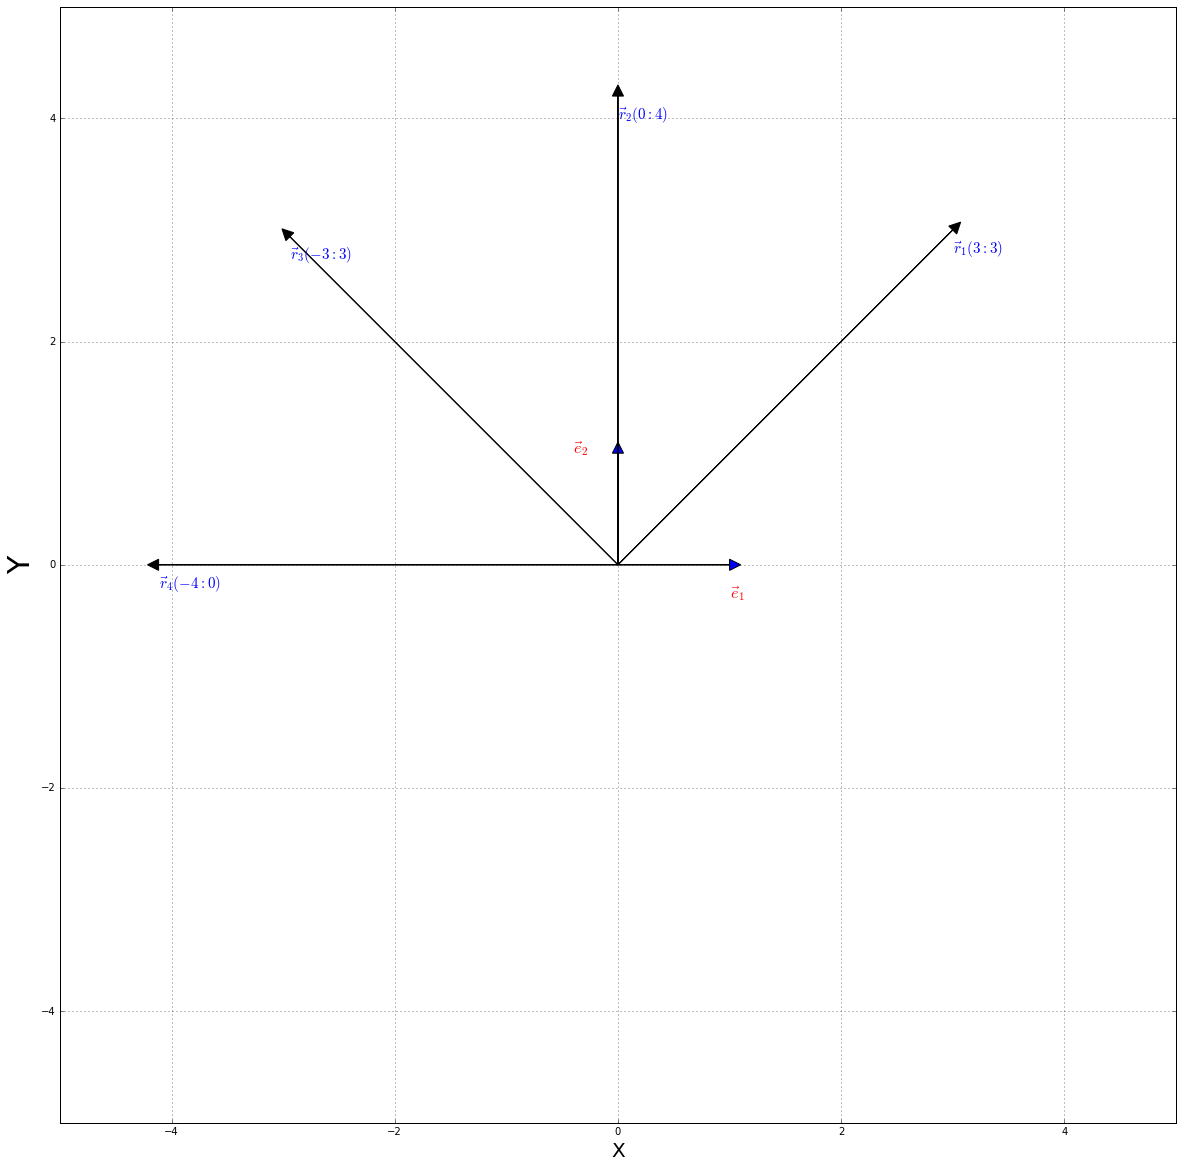

In [131]:
g = VectorGround(range=[-5,5])
A = np.array([[0.7,-0.7],[0.7,0.7]])
b = np.transpose(np.array([[3,3]]))
g.add_v(0,0,b[0][0],b[1][0])
t_v = A.dot(b)
print(t_v)
g.add_v(0,0,t_v[0][0],t_v[1][0],index='2')
t2_v = A.dot(t_v)
g.add_v(0,0,t2_v[0][0],t2_v[1][0],index='3')
t2_v = A.dot(t2_v)
g.add_v(0,0,t2_v[0][0],t2_v[1][0],index='4')

The above example shows that the matrix $$T(x_2)= T(\alpha) =  \begin{bmatrix}cos(\alpha) & -sin(\alpha) \\ sin(\alpha) & cos(\alpha)  \end{bmatrix}$$ rotates the every vector $x \in L^2 $ with degree alpha that is the rotating tranformations <br>

### Scaling tranfomration (symtric matrix):
lets to have symetric 
$$T(x)=  \begin{bmatrix} x & 0 \\ 0 & x  \end{bmatrix}$$ <br>
and x-1.5 we have $$ T(x)=  \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} * \begin{bmatrix} 3 \\ 3   \end{bmatrix} = =\begin{bmatrix} 6 \\ 6 \end{bmatrix} $$ <be> <br>
 $$ T(x)=  \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} * \begin{bmatrix} 6 \\ 6   \end{bmatrix} = =\begin{bmatrix} 12 \\ 12 \end{bmatrix} $$



[[6]
 [6]]


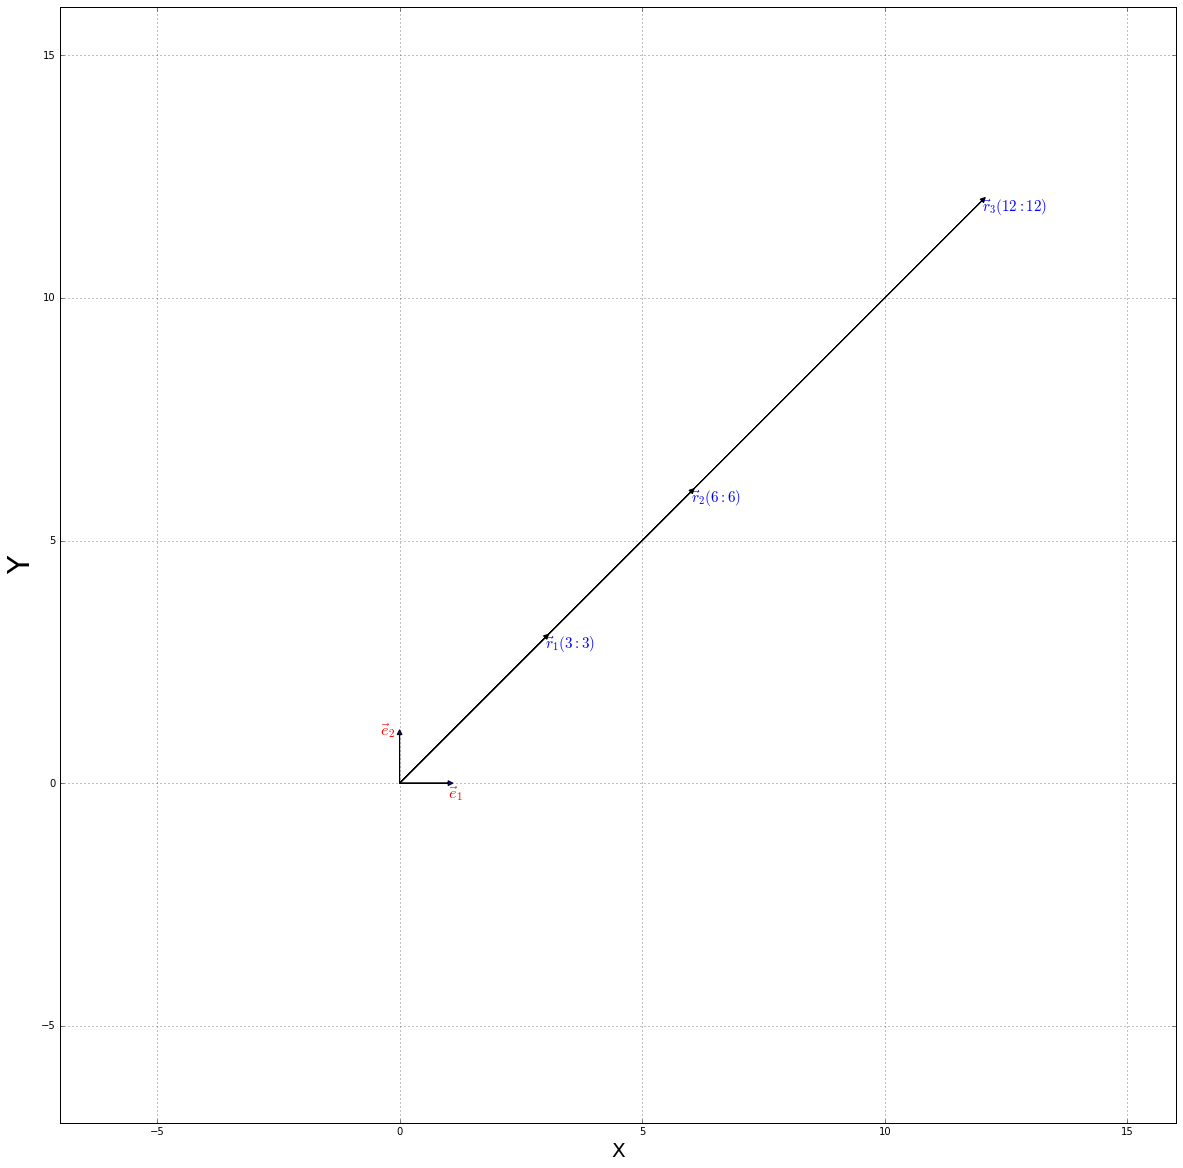

In [132]:
g = VectorGround(range=[-7,16])
A = np.array([[2,0],[2,0]])
b = np.transpose(np.array([[3,3]]))
g.add_v(0,0,b[0][0],b[1][0])
t_v = A.dot(b)
print(t_v)
g.add_v(0,0,t_v[0][0],t_v[1][0],index='2')
t2_v = A.dot(t_v)
g.add_v(0,0,t2_v[0][0],t2_v[1][0],index='3')


#### we can see that the linear traformation just scaling the vector with 2

### Roation + Scaling
We see that the antisymetric matrix make rotation over vector and symtrix matrix making a scaling we can combine both matrix to achieve new matrix wich will make scaling and rotating 
lets to have tranformations $T_1,T_2$ <br>
$$ T(\alpha) = \begin{bmatrix}cos(\alpha) & -sin(\alpha) \\ sin(\alpha) & cos(\alpha)  \end{bmatrix} $$ <br> <br>
$$T_2(x)=  \begin{bmatrix} x & 0 \\ 0 & x  \end{bmatrix}$$ <br>
$$T_1.(T_2.(x)) = (T_1*T_2).(x)= T_3(x)$$ <br> <br>
$$T_3(x) = \begin{bmatrix}cos(\alpha) & -sin(\alpha) \\ sin(\alpha) & cos(\alpha)  \end{bmatrix}*  \begin{bmatrix} x & 0 \\ 0 & x  \end{bmatrix}=\begin{bmatrix}cos(\alpha)*x & -sin(\alpha)*x \\ sin(\alpha)*x & cos(\alpha)*x  \end{bmatrix}$$
example :
$$T_1=\begin{bmatrix}cos(30^*) & -sin(30^*) \\ sin(30^*) & cos(30^*)  \end{bmatrix}$$
$$T_2=  \begin{bmatrix} 2 & 0 \\ 0 & 2  \end{bmatrix}$$ <br> <br>

$$T_3=\begin{bmatrix}cos(30^*) & -sin(30^*) \\ sin(30^*) & cos(30^*)  \end{bmatrix}*\begin{bmatrix} 2 & 0 \\ 0 & 2  \end{bmatrix}=\begin{bmatrix}  2*cos(30^*) & - 2*sin(30^*) \\  2*sin(30^*) & 2*cos(30^*)  \end{bmatrix}$$


$$T_3=\begin{bmatrix} 1.7 & - 0.9 \\ 0.9 & 1.7  \end{bmatrix}$$

[[2.4]
 [7.8]]
[[-2.94]
 [15.42]]
[[-18.876]
 [ 23.568]]
[[-53.3004]
 [ 23.0772]]
[[-111.38016]
 [  -8.73912]]
[[-181.481064]
 [-115.098648]]


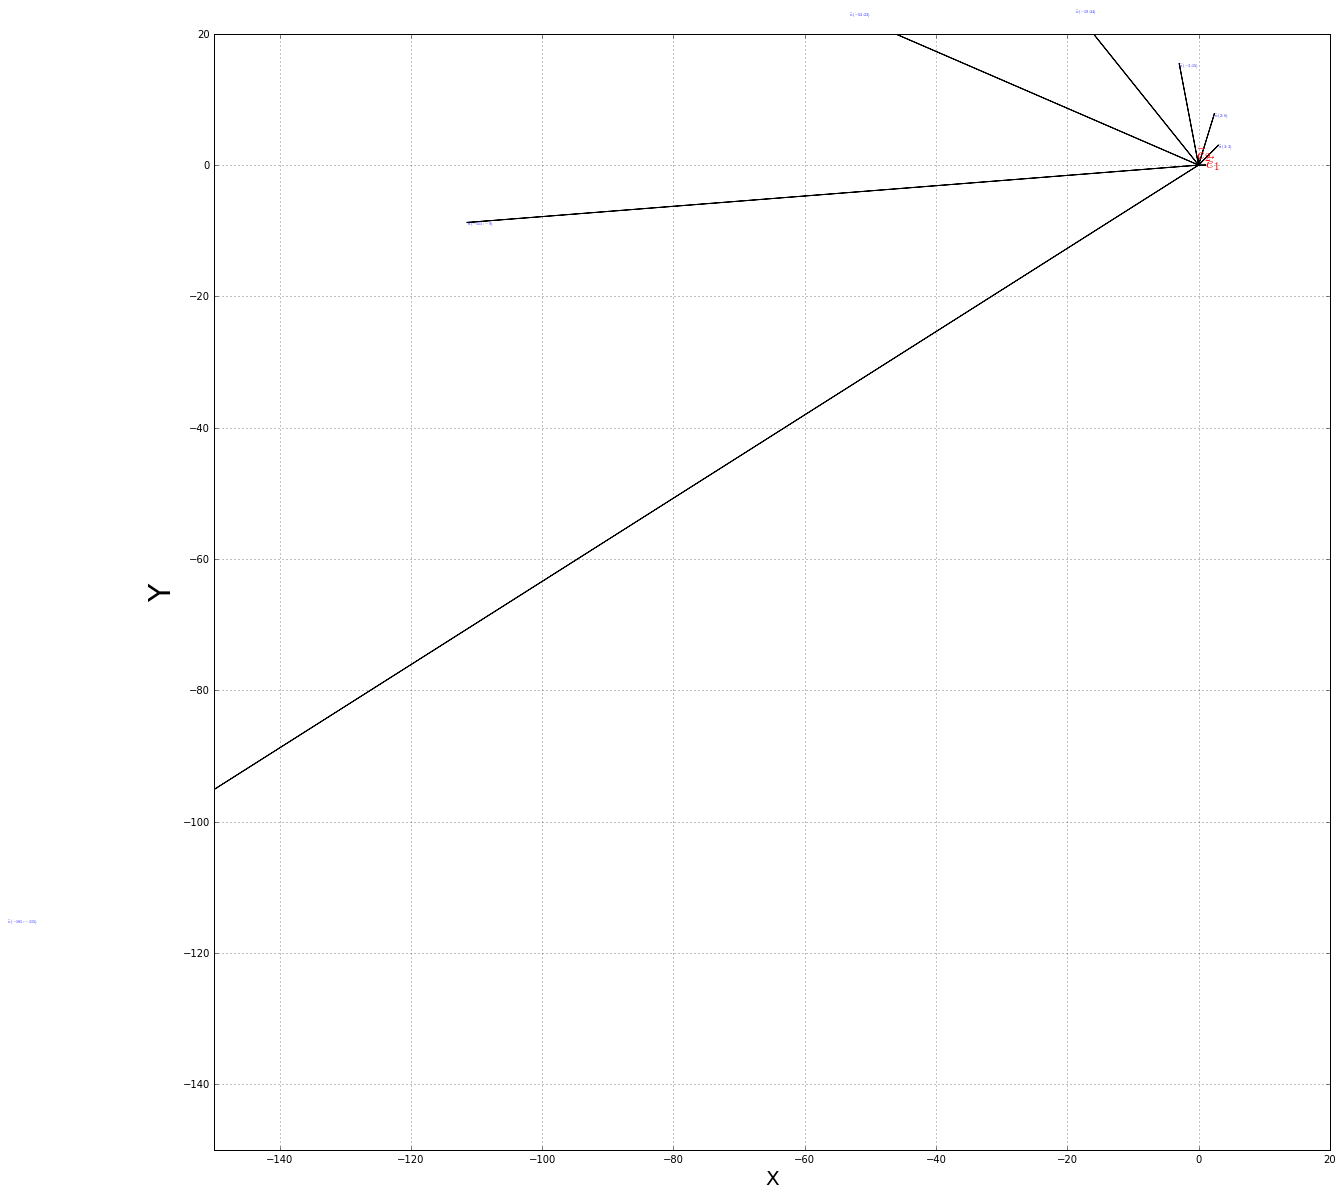

In [134]:
g = VectorGround(range=[-150,20])
A = np.array([[1.7,-0.9],[0.9,1.7]])
b = np.transpose(np.array([[3,3]]))
g.add_v(0,0,b[0][0],b[1][0],font_size=4)
for i in range(6) :
    b = A.dot(b)
    print(b)
    g.add_v(0,0,b[0][0],b[1][0],index=str(i),font_size=4)


     

<class 'numpy.ndarray'>
(81, 2)


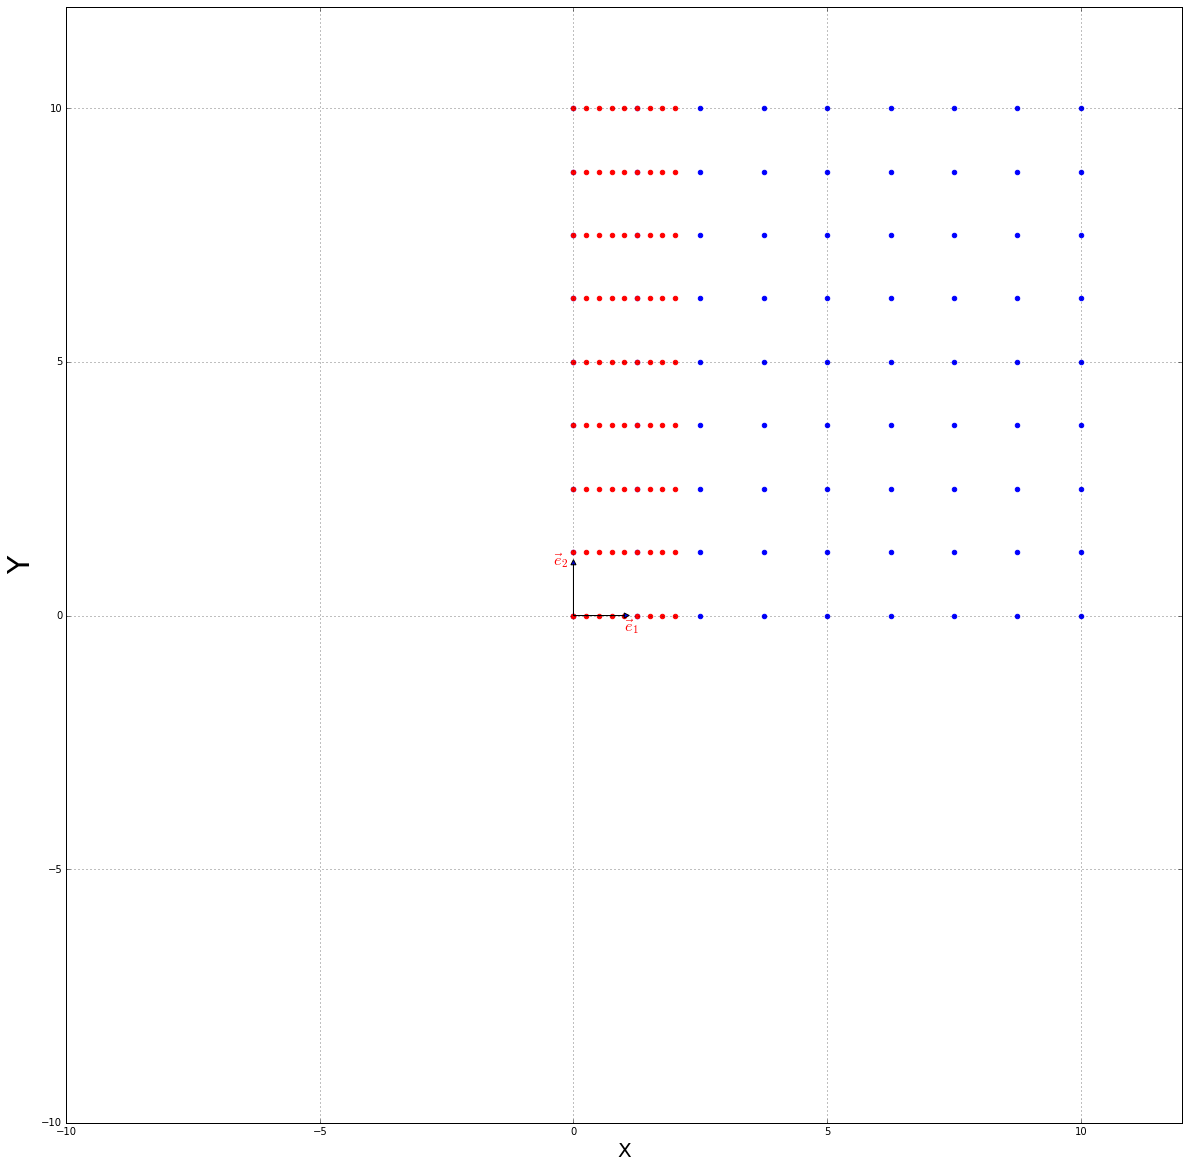

In [141]:
g = VectorGround(range=[-10,12])
def linear_tranformation(points,matrix):
    sh = points.shape
    print(sh)
    A = np.array([0,0])
    for i in points[:][:]:
        row = matrix.dot(i)
        A=np.vstack([A, row])
    return A
x_args=y_args = np.linspace(0,10,9)
points = np.meshgrid(x_args,y_args)
result = cartesian_product(x_args,y_args)
print(type(result))
g.plot_points(result)
new_points = linear_tranformation(result,np.array([[0.2,0],[0,1]]))  
g.plot_points(new_points,color='r')

<class 'numpy.ndarray'>
(81, 2)


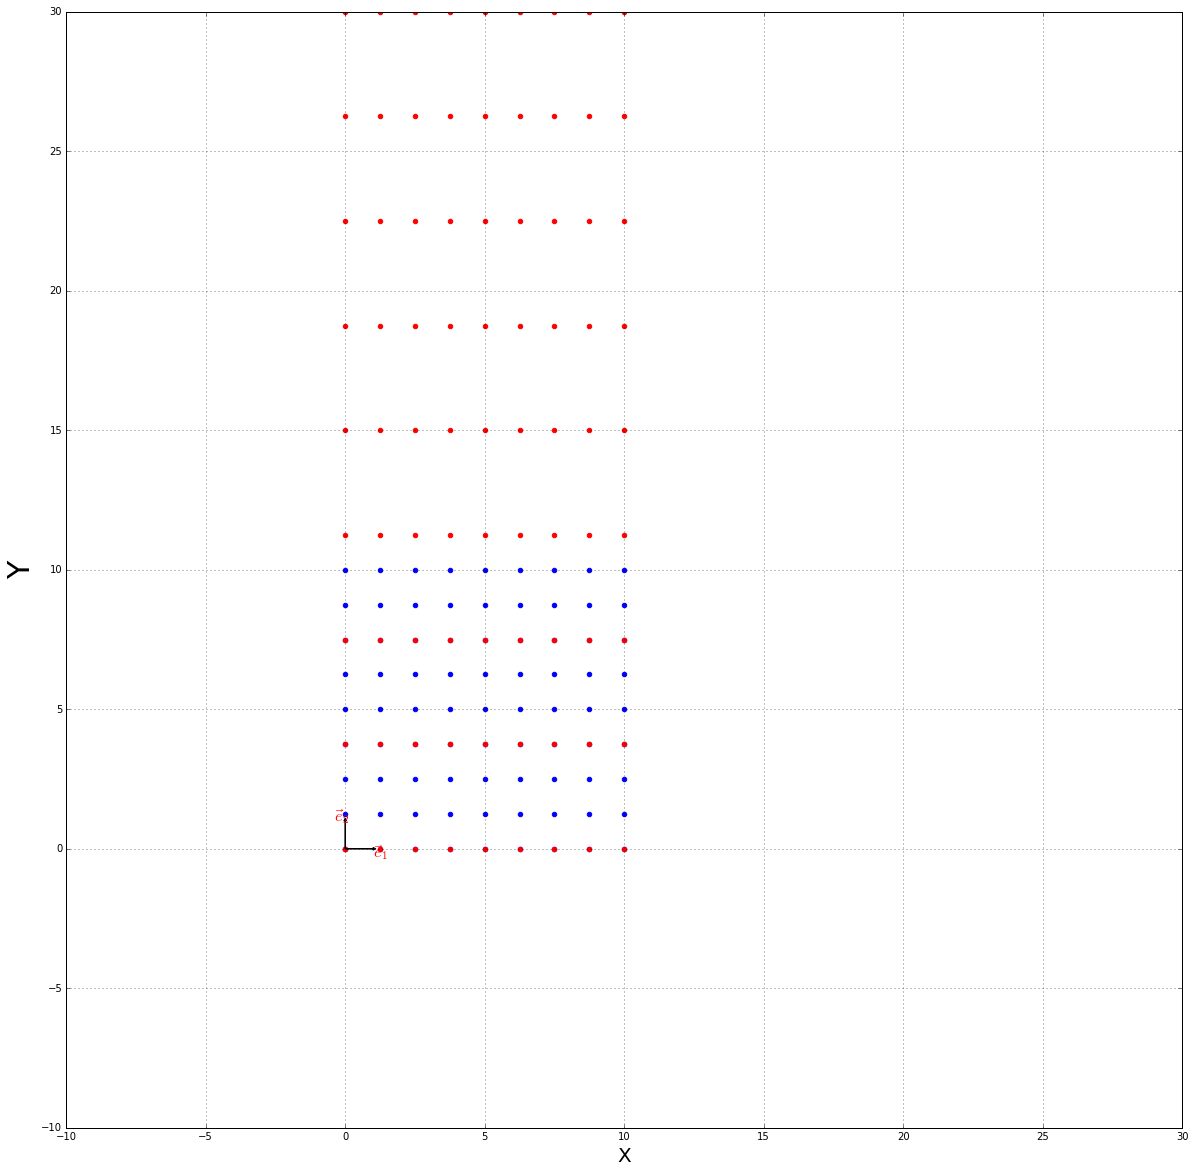

In [142]:
x_args=y_args = np.linspace(0,10,9)
points = np.meshgrid(x_args,y_args)
result = cartesian_product(x_args,y_args)
print(type(result))

g = VectorGround(range=[-10,30])

g.plot_points(result)
new_points = linear_tranformation(result,np.array([[1,0],[0,3]]))  
g.plot_points(new_points,color='r')

let to have matrix $$A =  \begin{bmatrix} 1.5 & 0.5 \\ 0.5 & 1.5  \end{bmatrix}$$
Eingvalues and eing vectors of A
$$\gamma_1 = 1,\vec{v_1} =  \begin{bmatrix} -0.7  \\ 0.7   \end{bmatrix},\vec{v_2} =  \begin{bmatrix} 0.7  \\ 0.7   \end{bmatrix} $$  

<class 'numpy.ndarray'>
(81, 2)


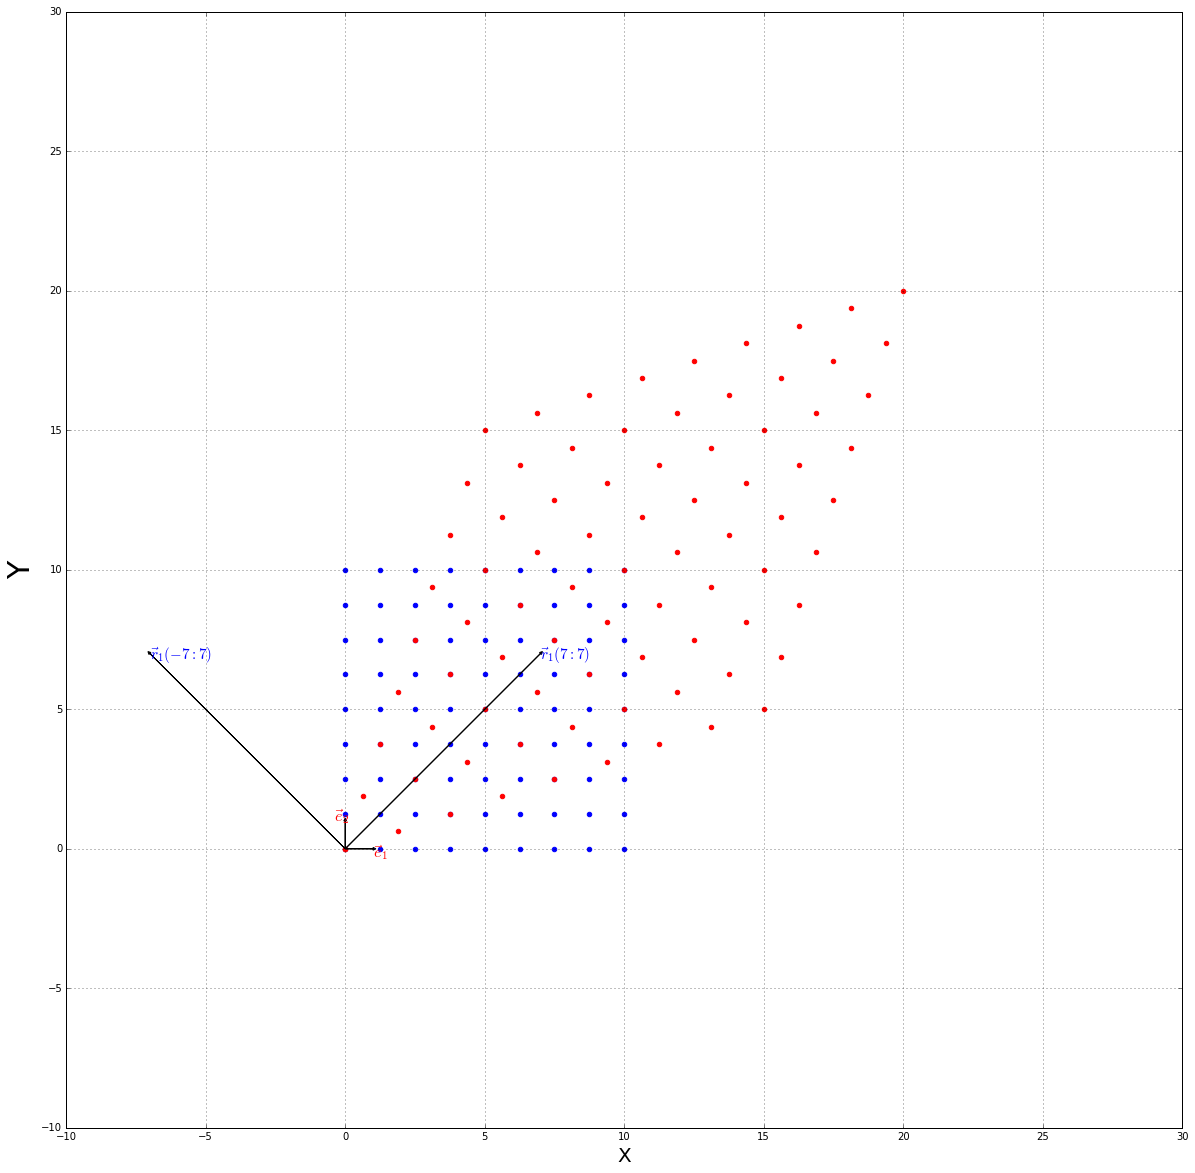

In [144]:
x_args=y_args = np.linspace(0,10,9)
points = np.meshgrid(x_args,y_args)
result = cartesian_product(x_args,y_args)
print(type(result))
g = VectorGround(range=[-10,30])
g.plot_points(result)
new_points = linear_tranformation(result,np.array([[1.5,0.5],[0.5,1.5]]))  
g.plot_points(new_points,color='r')
g.add_v(0,0,-10*-0.7,10*0.7)
g.add_v(0,0,-10*0.7,10*0.7)